In [6]:
import numpy as np
from skimage import io as sio
from skimage import filters as sif
from skimage import measure as sms
from skimage import draw as sdr
from skimage import color as scl
from skimage import exposure as sxp
from skimage import morphology as smp
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize'] = [12, 9]

# Filepath
filepath = 'data/Fluo-N2DL-HeLa'
collection_pattern = f'{filepath}/01/t*.tif'

# Utility functions

def show_image(image):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
def show_image_c(image):
    plt.figure()
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.show()

Process one image

TypeError: Invalid shape (92, 700, 1100) for image data

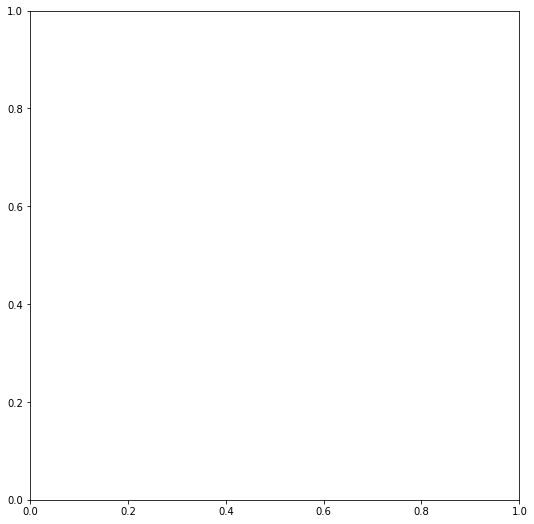

In [19]:
# Load an example image (and rescale it)
image = sio.imread_collection(collection_pattern, plugin='tifffile')
image = sxp.rescale_intensity(image, out_range='uint8')

# Plot image
show_image(image)

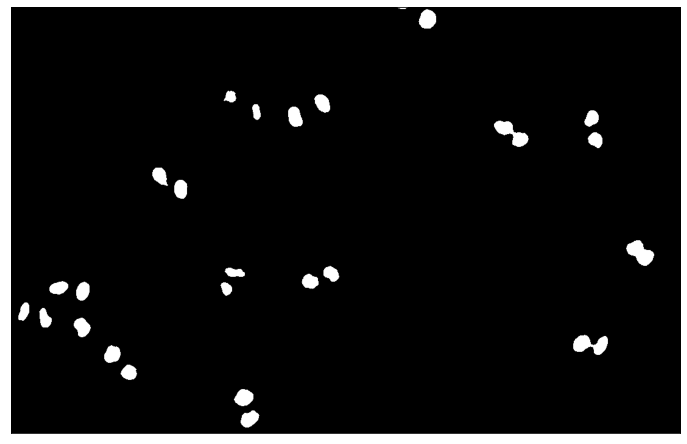

In [16]:
# Threshold image using Otsu's Method
thresh = sif.threshold_otsu(image)
binary_image = thresh <= image

# Fill the holes
selem = smp.disk(5)
binary_image = smp.binary_closing(binary_image, selem)
binary_image = smp.binary_opening(binary_image)

# Plot image
show_image(binary_image)

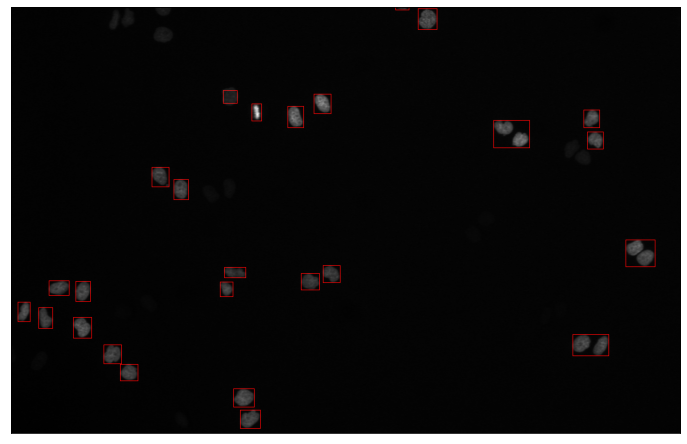

In [17]:
# Get connected components of image
ccomp_image = sms.label(binary_image)

# Display cell regions
props = sms.regionprops(ccomp_image)

props_image = scl.gray2rgb(image)
shape = props_image.shape
for i, prop in enumerate(props):
    rs, cs, re, ce = prop.bbox
    rr, cc = sdr.rectangle_perimeter((rs, cs), (re, ce), shape=shape)
    props_image[rr,cc,0] = 255
show_image_c(props_image)